In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [390]:
patients=pd.read_csv('../dataset/liver_train.csv')

In [391]:
patients.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [392]:
patients.shape


(30691, 11)

In [393]:
patients['Gender of the patient']=patients['Gender of the patient'].apply(lambda x:1 if x=='Male' else 0)

In [394]:
patients.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [395]:
patients.isnull().sum()


Age of the patient                        2
Gender of the patient                     0
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [396]:
patients.dropna(axis=0,inplace=True)

# Transforming data

True Cases - Person has Liver disease

In [397]:
#True-df1
df1 = patients[patients.Result != 2]


In [398]:
df1.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [399]:
df1.drop(df1.index[1:11500], axis=0, inplace=True)


In [400]:
df1.shape

(8334, 11)

False Cases - Person Doesn't have liver disease.

In [401]:
#false df2
df2 = patients[patients.Result != 1]

In [402]:
df2.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
8,17.0,1,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
12,64.0,1,0.9,0.3,310.0,61.0,58.0,7.0,3.4,0.90,2
15,25.0,1,0.6,0.1,183.0,91.0,53.0,5.5,2.3,0.70,2
17,33.0,1,1.6,0.5,165.0,15.0,23.0,7.3,3.5,0.92,2
24,63.0,1,0.9,0.2,194.0,52.0,45.0,6.0,3.9,1.85,2


In [403]:
df2.shape

(7833, 11)

# Concatination

In [404]:
frames = [df1, df2]
  
result = pd.concat(frames)
display(result)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
17771,46.0,1,0.7,0.2,145.0,53.0,41.0,5.8,2.7,0.87,1
17773,55.0,1,1.8,0.8,342.0,168.0,441.0,7.6,4.4,1.30,1
17775,44.0,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,1
17776,51.0,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
30670,43.0,0,1.0,0.3,187.0,19.0,23.0,5.2,2.9,1.20,2
30671,50.0,1,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
30672,57.0,0,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
30674,60.0,0,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,2


In [405]:
result.shape

(16167, 11)

In [406]:
result['Result'].value_counts()

1    8334
2    7833
Name: Result, dtype: int64

In [407]:
result.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [408]:
display(result)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
17771,46.0,1,0.7,0.2,145.0,53.0,41.0,5.8,2.7,0.87,1
17773,55.0,1,1.8,0.8,342.0,168.0,441.0,7.6,4.4,1.30,1
17775,44.0,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,1
17776,51.0,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
30670,43.0,0,1.0,0.3,187.0,19.0,23.0,5.2,2.9,1.20,2
30671,50.0,1,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
30672,57.0,0,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
30674,60.0,0,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,2


In [409]:
result.dropna(axis=0,inplace=True)

In [410]:
result.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

<AxesSubplot:>

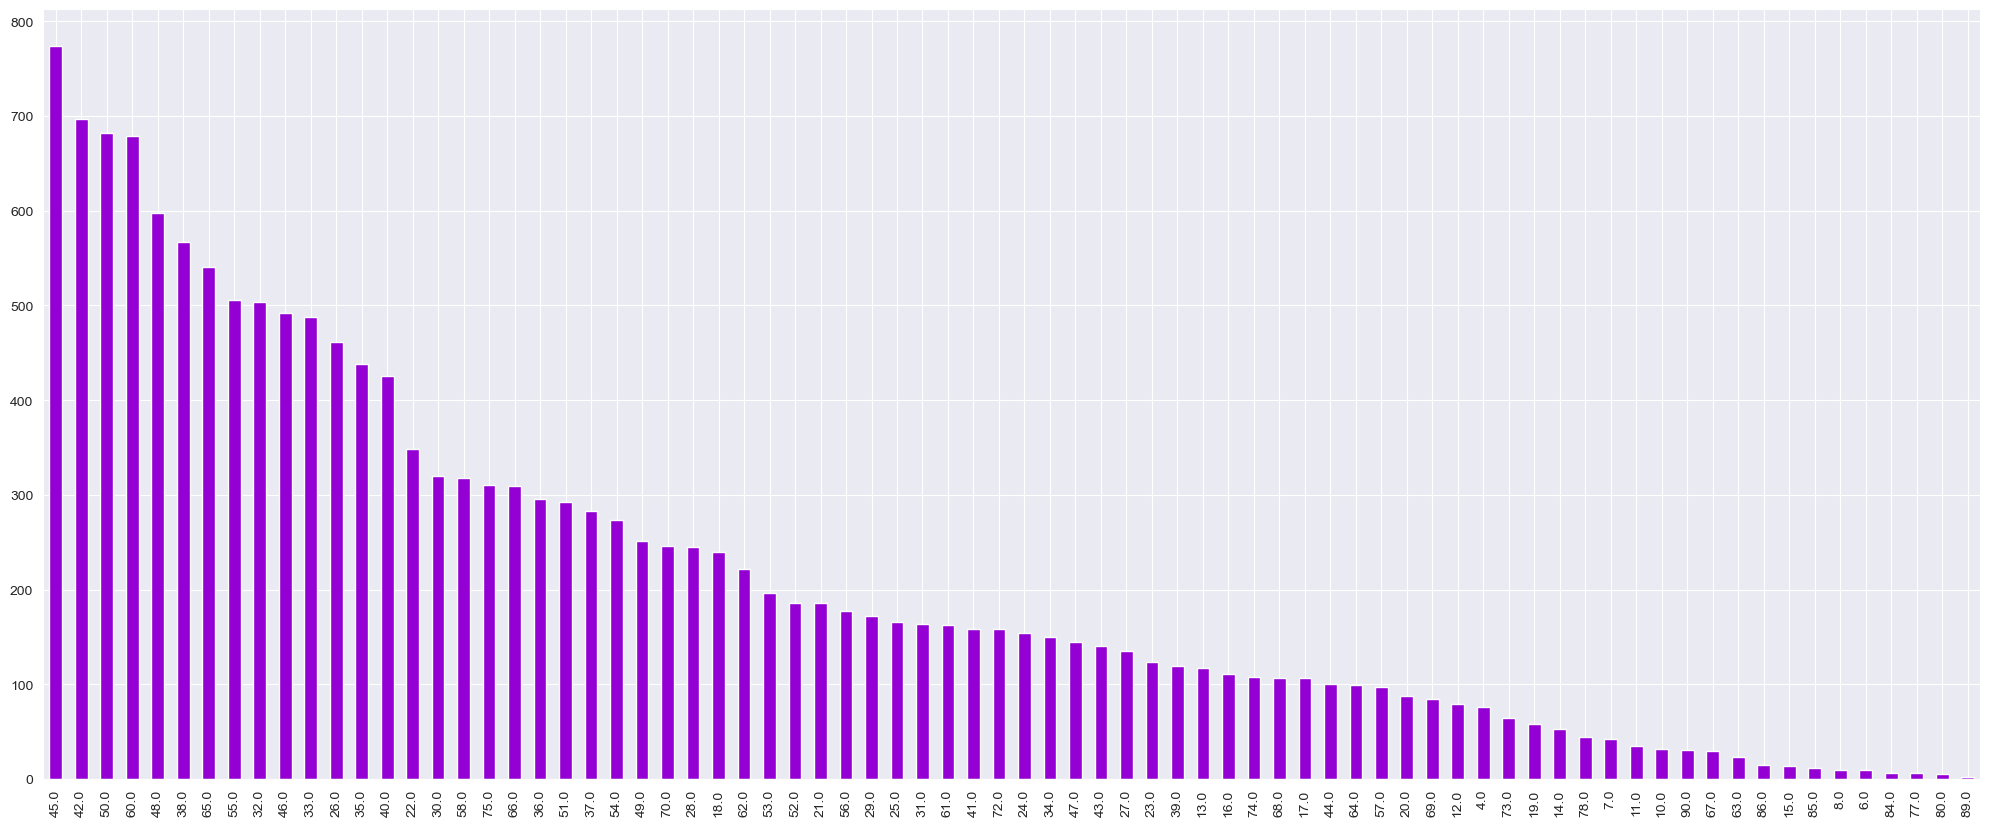

In [411]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
result['Age of the patient'].value_counts().plot.bar(color='darkviolet')

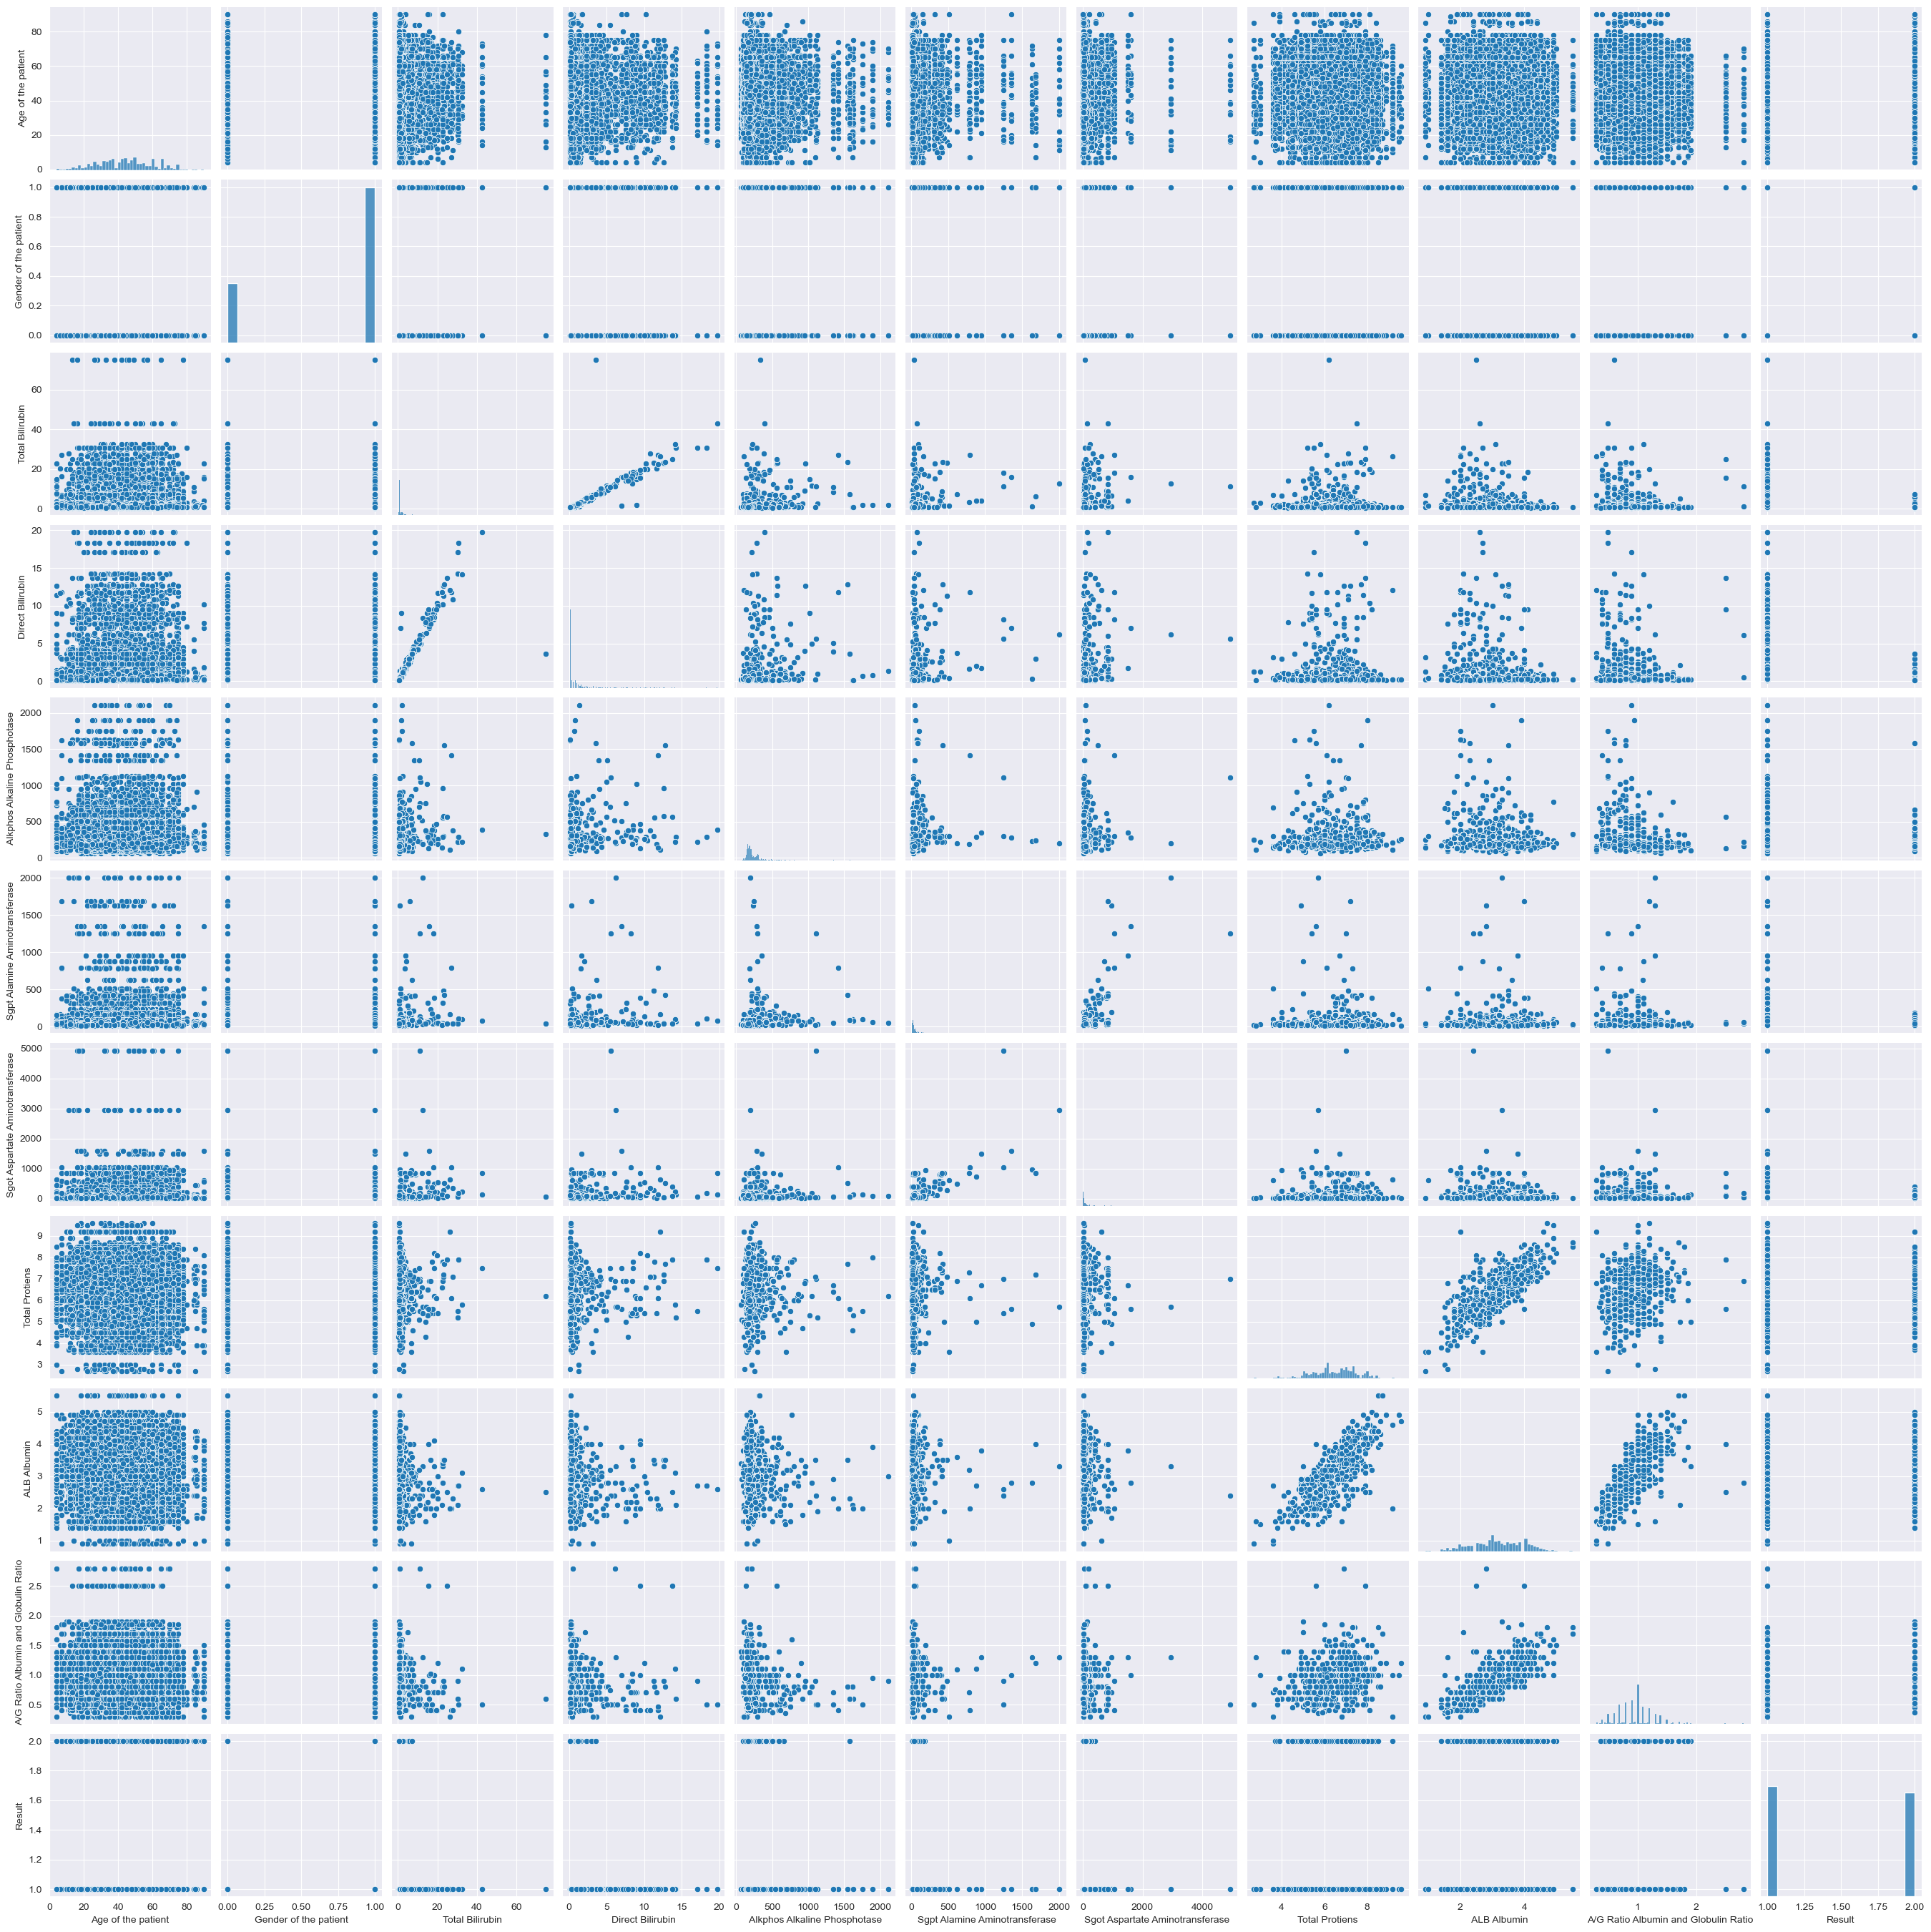

In [412]:
sns.pairplot(result)

In [413]:
corr=result.corr()

<AxesSubplot:>

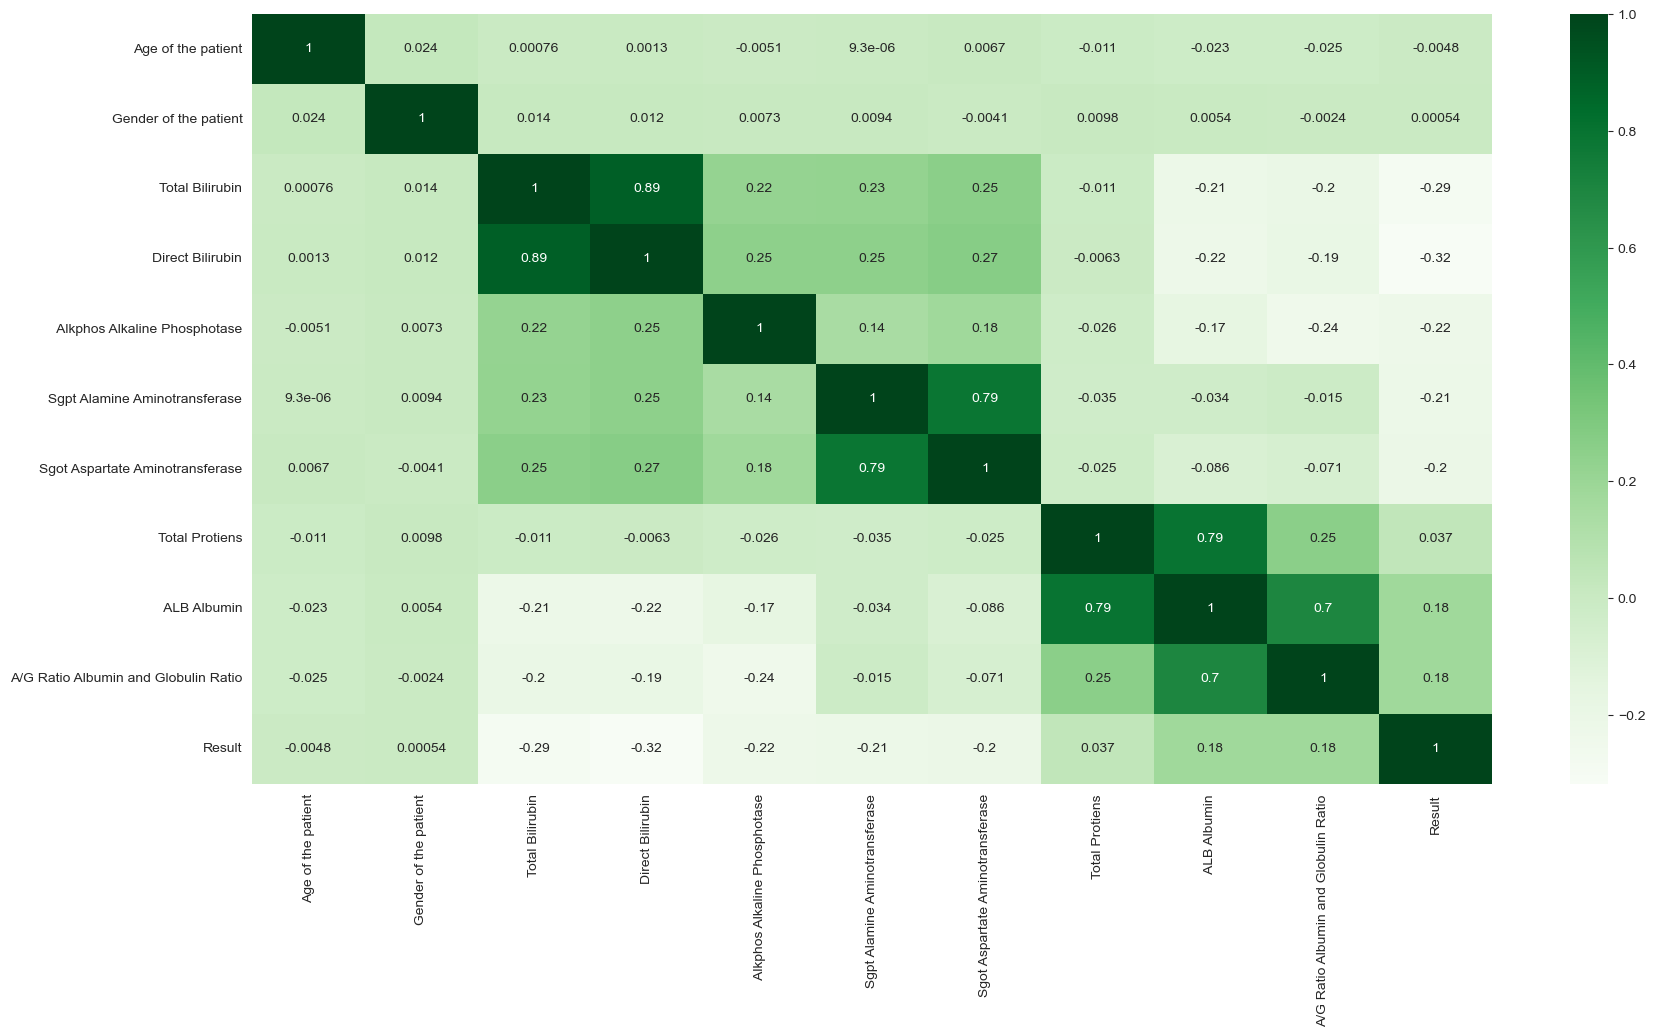

In [414]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
result.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [417]:
X=result.drop(columns='Result',axis=1)
y=result['Result']

In [418]:
result.describe


<bound method NDFrame.describe of        Age of the patient  Gender of the patient  Total Bilirubin  \
0                    65.0                      0              0.7   
17771                46.0                      1              0.7   
17773                55.0                      1              1.8   
17775                44.0                      1              0.9   
17776                51.0                      1              0.9   
...                   ...                    ...              ...   
30670                43.0                      0              1.0   
30671                50.0                      1              2.6   
30672                57.0                      0              2.6   
30674                60.0                      0              0.7   
30679                74.0                      1              0.6   

       Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0                   0.1                          187.0   
17771               0

In [419]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [421]:
#accuracy on the training data - Logistic Regression
X_train_prediction=logmodel.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [422]:
print("Accuracy on training data :",training_data_accuracy)

Accuracy on training data : 0.7008660303994344


In [423]:
#accuracy on the test data
X_test_prediction=logmodel.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [424]:
print("Accuracy on test data :",testing_data_accuracy)


Accuracy on test data : 0.704596990311276


In [433]:
input_data=(48,0,1,0.3,310,37,56,5.9,2.5,0.7)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=logmodel.predict(input_data_reshape)
print(prediction)

[1]


In [434]:
import pickle

In [436]:
filename='liver_model_new2.sav'
pickle.dump(logmodel, open(filename,'wb'))

In [437]:
loaded_model=pickle.load(open('liver_model_new2.sav','rb'))